# Clustering Example

This task lets you explore different clustering approaches (kmeans and hierarchical). First, the data is loaded and you should estimate, how many real cluster where used to generate thes examples. 

You will use a different approach to measure the quality of the clustering approaches using the teh Silhouette Score. 

You will compare the clustering to the ground truth answering the question of how good your clustering is, when compared to the real labels. 

Furthermore, some initail plotting functions are indirectly introduced. 


In [1]:
import sys,os,os.path
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style("white")
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances


## Loading a dataset

In [2]:
data_file = 'mystery_data_a1.csv'
df = pd.read_csv(data_file,index_col='id')


### Simple plotting

Plot the data (as it is only 2D)

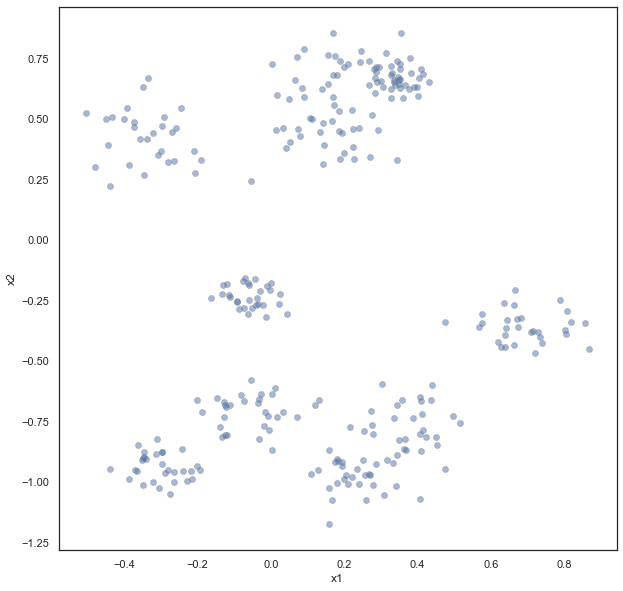

In [3]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x="x1", y="x2",data=df,edgecolor='grey',alpha=0.5)

### k-Means

Do a first kmeans clustering using three clusters. Save the generated cluster assignements and score. 

In [4]:
X = df[['x1','x2']]

kmeans = KMeans(n_clusters=3, init='random').fit(X)

kmeans_centroids            = kmeans.cluster_centers_
kmeans_labels_k3            = kmeans.labels_
kmeans_labels_cluster_score = kmeans.inertia_


#### Centroids

Store the centroids and the input data in a new dataframe for plotting

In [5]:
df_centroids = pd.DataFrame(kmeans_centroids,columns=['x1','x2'])

#### Plotting data and centroids

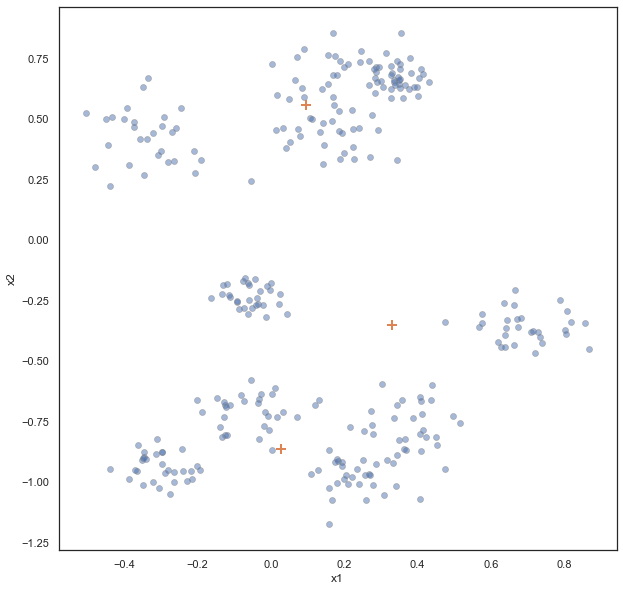

In [6]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x="x1", y="x2",data=df,edgecolor='grey',alpha=0.5)
ax = sns.scatterplot(x="x1", y="x2",data=df_centroids,linewidth=2.0,marker='+',s=100)


#### A bit more colourful

Same as before, but using the assigned labels for coloring. 

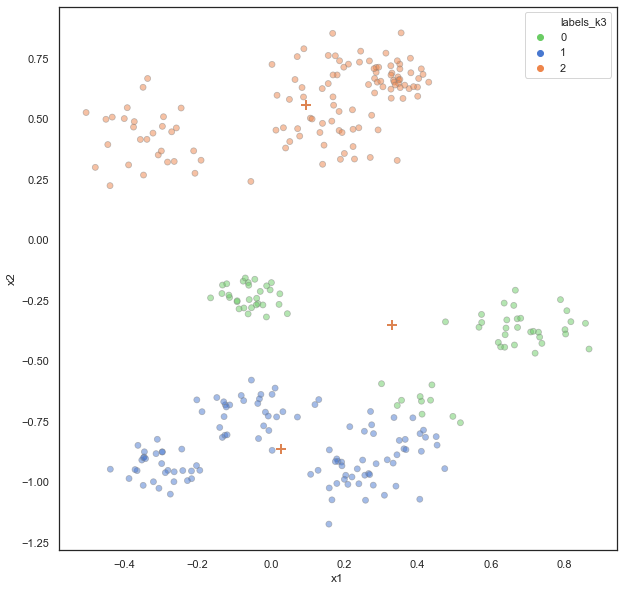

In [7]:
df['labels_k3'] = kmeans_labels_k3
colorPalette='muted'
colors = dict(zip(df['labels_k3'].unique(),sns.color_palette(colorPalette)))


plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x="x1", y="x2",hue='labels_k3',palette=colors,data=df,edgecolor='grey',alpha=0.5)
ax = sns.scatterplot(x="x1", y="x2",data=df_centroids,linewidth=2.0,marker='+',s=100)


### Silhouette Score

The score given by the kmean algorithm is only applicable to kmean and not to other available clustering approaches. An alternative score is the so-called Silhouette Score (see https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) for more details. It takes into account the mean distance between a sample and all other points in the same class and mean distance between a sample and all other points in the next nearest cluster. The higher this score, the better the underlying clustering approach. The following loads the required parts and applies it to the example before. 

In [8]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
metrics.silhouette_score(X, kmeans_labels_k3, metric='euclidean')


0.5166388969467182

## Finding the 'best' number of clusters

The following is a skeleton of a approach of going through k={1..10} to find the best k.

```python
centroids = {}
cluster_score = {}
for k in range(1,10):

    
    df['cluster_k{}'.format(k)] = 
    cluster_score[k] = kmeans.inertia_ # you might want to use the silhoute score here

   
```

Please fill in the missing parts and plot scores with regrads to k using the following approach:

```python
df_scores = pd.DataFrame.from_dict(cluster_score,orient='index',columns=['J'])
df_scores['k'] = df_scores.index
ax = sns.scatterplot(x='k', y='J',data=df_scores)
```


I.e., you might want to store your results (from each of the k in the loop) in another DataFrame, so it is easier to plot using ```sns.scatterplot(...)```.

In [51]:
results    = {
    'centroids':{},
    'kmeans_internal':{},
    'silhouette_score':{},
    }

min_clust_num = 2
max_clust_num = 15

for k in range(min_clust_num,max_clust_num+1):
    kmeans = KMeans(n_clusters=k, init='random').fit(X) # if you leave out initi='random' - it will use kmeans ++
    df['cluster_k{}'.format(k)] = kmeans.labels_
    results['centroids'][k]        = kmeans.cluster_centers_
    results['kmeans_internal'][k]  = kmeans.inertia_ # you might want to use the silhoute score here
    results['silhouette_score'][k] = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')




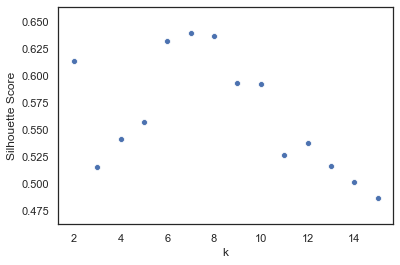

In [53]:
#df_scores = pd.DataFrame.from_dict(results['kmeans_internal'],orient='index',columns=['J'])
#df_scores['k'] = range(min_clust_num,max_clust_num+1)

#ax = sns.scatterplot(x='k', y='J',data=df_scores)



df_scores = pd.DataFrame.from_dict(results['silhouette_score'],orient='index',columns=['Silhouette Score'])
df_scores['k'] = range(min_clust_num,max_clust_num+1)
ax = sns.scatterplot(x='k', y='Silhouette Score',data=df_scores)



## Comparing to Ground Truth 

The file mystery_data_a1.csv' was generated simple 2D Gaussians. The file 'mystery_data_a1_k.csv' contains the actual labels of each example. Can you load the data and compare the ground thruth (the actual labels given in the additional column) to the ones you have found using your clustering?

It might not be totally easy, as the labels generated by the clustering might not be the same by name as the ones given in the file. You might have to do a bit of manual investigation ... 

However, there exists a method to compare the similarity beteen two clusterings (here: the ground truth and your clustering). The Rand Index does exactly this ( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html ) 



In [9]:
# Rand score example: 
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score([0, 0, 0, 1, 1], [1, 1, 0, 2, 2])

0.5454545454545454

Load the fully labeled data and compare your clustering. A warning in general: when comparing the labels you usually have to ensure that the data from the ground thruth is for the same example (i.e. the order is the same). Here both files have the same ids in the same order. 

In [24]:
data_file_gt = 'mystery_data_a1_k.csv'
df_gt = pd.read_csv(data_file_gt,index_col='id')

# assuming that both files have the same IDs. Take the index (IDs) from df and resort df_gt with those:
df_gt = df_gt.loc[df.index]


In [22]:
df.index

Int64Index([138, 246,  61, 236,  70, 257,  86, 251, 256,  30,
            ...
            226, 284, 204,  79, 247, 199, 212, 197,  63, 179],
           dtype='int64', name='id', length=300)

In [28]:
labels_ground_truth = df_gt['k']

for k in range(min_clust_num,max_clust_num+1):
    labels_at_k = df['cluster_k{}'.format(k)]
    print(k, adjusted_rand_score(labels_ground_truth,labels_at_k))



2 0.18146265154477903
3 0.3129432272889347
4 0.3772979287944639
5 0.4809361537966952
6 0.5981370018727813
7 0.6619306825655819
8 0.7852863755025834
9 0.8563438928804703
10 0.8275534212526695
11 0.7894420858704086
12 0.8225164027705579
13 0.7984623959273028
14 0.780186093102858
15 0.7336370030447058


According to the rand_score, the best clustering is at k=9. 

The original had actually 10 Gaussians. 



# Hierarchical Clustering

## SciPy

The first approach is using hierarchical clustering from a different module (SciPy). This is mainly because of its ability to produce a nice dendogram.  

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

In case you have added addional information to the original dataframe, only take the original data



In [30]:
df_hier = df[['x1','x2']]

The call to the clustering is failry simple. Different linckage exsists. Have have a look at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

Try out different settings.

In [31]:
linked = linkage(df_hier[['x1','x2']], 'single')

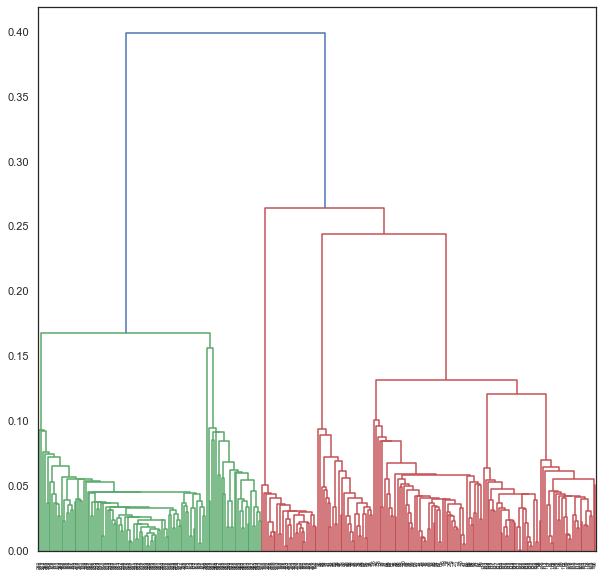

In [32]:
plt.figure(figsize = (10, 10))
dendrogram(linked,
            orientation='top',
            labels=df_hier.index,
            show_leaf_counts=True)
plt.show()

## Hierarchical clustering using sklearn

For all options, please have a look at:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html



In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
X = df_hier
hclustering = AgglomerativeClustering(linkage='single',n_clusters=3).fit(X)
hclustering_labels_k3  = hclustering.labels_
#kmeans_labels_cluster_score = kmeans.inertia_



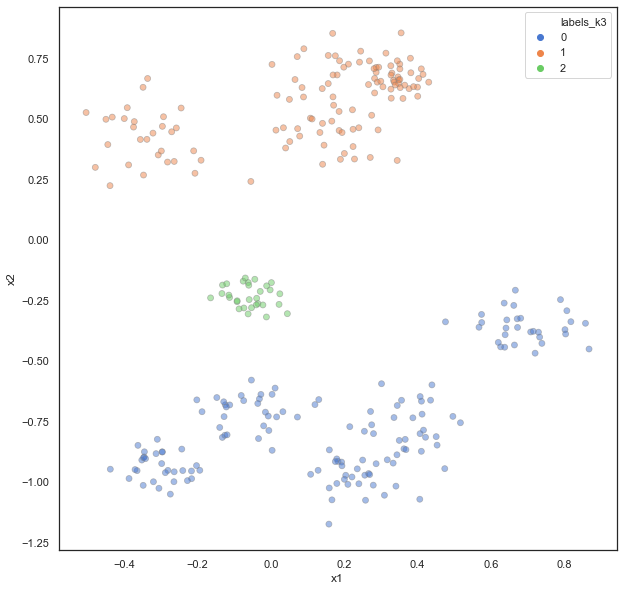

In [35]:
df['labels_k3'] = hclustering_labels_k3
colorPalette='muted'
colors = dict(zip(df['labels_k3'].unique(),sns.color_palette(colorPalette)))


plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x="x1", y="x2",hue='labels_k3',palette=colors,data=df,edgecolor='grey',alpha=0.5)



## Finding the best number of clusters using hierarchical clustering

Can you re-use your approach from above to estimate the best number of clusters? It should be straight forward, if you have been using the Silhouette Score from above. If you have not done so, please adept this part further up in the notebook. 



In [49]:
results_hier    = {
    'silhouette_score':{},
    }

min_clust_num = 2
max_clust_num = 15

for k in range(min_clust_num,max_clust_num+1):
    # not very efficient - could do hierarchical once and then go down the tree
    # using scipy, this is easily possible using the fcluster method
    # more information here: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.htmlhttps://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
    # Hoever, we said: reuse, so that is what is in here
    hclustering = AgglomerativeClustering(linkage='single',n_clusters=k).fit(X)
    df['hier_cluster_k{}'.format(k)] = hclustering.labels_
    results_hier['silhouette_score'][k] = metrics.silhouette_score(X, hclustering.labels_, metric='euclidean')



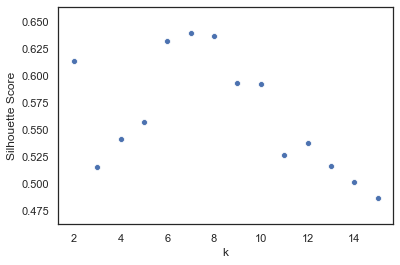

In [54]:
df_hier_scores = pd.DataFrame.from_dict(results['silhouette_score'],orient='index',columns=['Silhouette Score'])

df_hier_scores['k'] = range(min_clust_num,max_clust_num+1)

ax = sns.scatterplot(x='k', y='Silhouette Score',data=df_hier_scores)




# Single cell RNA-seq

This example will be focused on real world applications of clustering. Consider a single cell RNA-seq dataset, taken from Pollen et al. (2014) study, which consists of 300 single cells (SC), measured across 8686 genes. 

Potentially reusing some part of your code before, use a clustering approach for different number of clusters k = [1,...,12]. You should establish how many different cell types this dataset might contain In order to determine the most appropriate number of clusters

First the data is loaded an processed.

In [55]:
cell_libraries_file = 'CellLibraries.txt'
df_c = pd.read_csv(cell_libraries_file)

pollen_file = 'Pollen2014.txt'
df_p = pd.read_csv(pollen_file)

df_p = df_p.apply(lambda x : np.log2(x+1)) # log transformation of count data
df_p = df_p.transpose() # cells in rows, genes in columns


In [56]:
df_p.head()

,MTND2P28,MTATP6P1,NOC2L,ISG15,CPSF3L,MXRA8,AURKAIP1,CCNL2,MRPL20,SSU72,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,MT-TP
Cell_2338_1,6.303781,11.004220,1.000000,11.528454,1.584963,0.0,8.243174,0.000000,8.370687,9.240791,...,0.000000,7.954196,1.000000,0.000000,0.000000,2.321928,0.000000,0.000000,0.000000,0.000000
Cell_2338_10,9.129283,10.935902,6.977280,12.270003,5.426265,0.0,7.055282,7.882643,8.900867,9.764872,...,9.845490,12.972441,13.281061,7.787903,10.649256,14.245924,12.389362,10.977995,14.341797,3.459432
Cell_2338_11,9.665336,12.265322,6.988685,9.182394,4.321928,0.0,6.022368,0.000000,8.174926,10.999295,...,11.074141,14.262095,13.745359,10.040290,11.001408,14.955559,12.283088,10.219169,14.339502,7.459432
Cell_2338_12,9.463524,12.106563,0.000000,9.033423,0.000000,0.0,8.945444,6.409391,7.800900,7.312883,...,10.952741,14.178042,13.765804,9.908393,10.676839,14.299494,12.745254,10.581201,14.329446,7.108524
Cell_2338_13,8.588715,11.350387,8.930737,11.349834,5.247928,0.0,3.584963,3.807355,5.491853,9.052568,...,9.733015,13.377888,13.944438,7.392317,10.485829,14.280046,12.598053,10.972980,13.996385,5.554589


In [57]:
df_c.head()


,Cell_Identifier,Population,Cell_names,TrueLabel_CellLevel,Tissue_name,TrueLabel_TissuelLevel
1,SRR1274192,Cell_2338_1,2338,1,DERMAL,1
2,SRR1274194,Cell_2338_10,2338,1,DERMAL,1
3,SRR1274196,Cell_2338_11,2338,1,DERMAL,1
4,SRR1274198,Cell_2338_12,2338,1,DERMAL,1
5,SRR1274200,Cell_2338_13,2338,1,DERMAL,1


For a first glance using the SciPy linkage function, we can look at an initial hierarchical clustering by looking at the dendogram. 

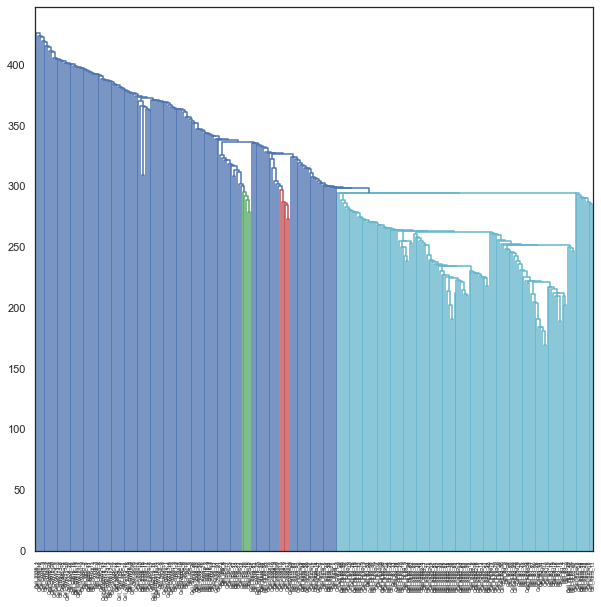

In [58]:
linked_p = linkage(df_p, 'single')
plt.figure(figsize = (10, 10))
dendrogram(linked_p,
            orientation='top',
            labels=df_p.index,
            show_leaf_counts=True)
plt.show()

## Plotting the data

As this is a high-dimanesional dataset, you can use dimensionality reduction methods such as PCA. Other commonly used approaches ate t-SNE or Spectral Embedding. Please note, that these methods can require some time and furthermore might have additional parameters

### Plotting using PCA

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_p) 
print(pca.explained_variance_ratio_) # Percentage of variance explained by each of the selected components.
df_p_pca = pd.DataFrame(pca.transform(df_p),index=df_p.index,columns=['pca_1','pca_2'])

[0.1882897  0.06250939]


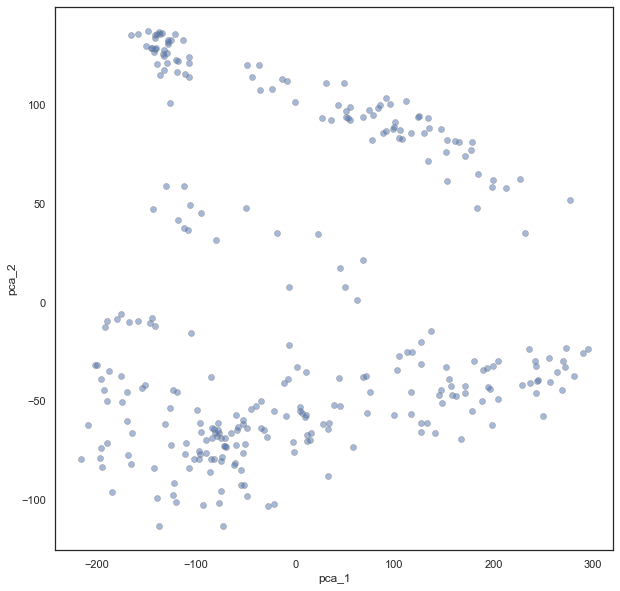

In [60]:
plt.figure(figsize = (10, 10))

ax = sns.scatterplot(x="pca_1", y="pca_2",data=df_p_pca,edgecolor='grey',alpha=0.5)

In [70]:
results_rnaseq = {
    'kmeans':{
        'silhouette_score':{},
        'labels':{},
        },
    'hierarchical':{
        'silhouette_score':{},
        'labels':{},
        }
    }



for k in range(min_clust_num,max_clust_num+1):
    #kmeans = KMeans(n_clusters=k, init='random').fit(df_p)

    kmeans = KMeans(n_clusters=k).fit(df_p)

    results_rnaseq['kmeans']['labels'][k]           = kmeans.labels_
    results_rnaseq['kmeans']['silhouette_score'][k] = metrics.silhouette_score(df_p, kmeans.labels_, metric='euclidean')
    
    hierarchical = AgglomerativeClustering(linkage='average',n_clusters=k).fit(df_p)
    results_rnaseq['hierarchical']['labels'][k]           = hierarchical.labels_
    results_rnaseq['hierarchical']['silhouette_score'][k] = metrics.silhouette_score(df_p, hierarchical.labels_, metric='euclidean')
    
    print(k,results_rnaseq['kmeans']['silhouette_score'][k],results_rnaseq['hierarchical']['silhouette_score'][k])


    
    #hclustering = AgglomerativeClustering(linkage='single',n_clusters=k).fit(X)
    #df['hier_cluster_k{}'.format(k)] = hclustering.labels_
    #results_hier['silhouette_score'][k] = metrics.silhouette_score(X, hclustering.labels_, metric='euclidean')





2 0.14119299523025358 0.15517325303859067
3 0.09890998175287047 0.1380991833655142
4 0.09081993179093958 0.13556601064882803
5 0.08868545398598676 0.13274410662541863
6 0.1029640462377692 0.13099027988316853
7 0.10300752863083813 0.11610105735427186
8 0.109218406955343 0.10053674472335933
9 0.0717627188972535 0.09969232040655833
10 0.10934492406403656 0.09730401250965237
11 0.06561967097328236 0.09456757099477779
12 0.11136942817857796 0.09440966007324064
13 0.10369796545244485 0.09423282413438744
14 0.09001608807156197 0.09231763046103719
15 0.06469561066147721 0.092013086950458


### Plotting using Spectral Embedding

In [ ]:
from sklearn.manifold import SpectralEmbedding

se = SpectralEmbedding(n_components=2)
df_p_se = pd.DataFrame(se.fit_transform(df_p),index=df_p.index,columns=['pca_1','pca_2'])
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x="pca_1", y="pca_2",data=df_p_se,edgecolor='grey',alpha=0.5)